In [1]:
%load_ext cudf.pandas

<img src="https://docs.xarray.dev/en/stable/_static/dataset-diagram-logo.png" align="right" width="30%">

# Basic Visualization

At the end of this lesson you will learn:

1. how to use xarray's convenient [matplotlib-backed](https://matplotlib.org/) plotting interface to
   visualize your datasets.
2. that `hvplot` provides an equally convenient interface for bokeh-backed plots

In [2]:
%%cudf.pandas.profile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

%config InlineBackend.figure_format='retina'

                                                                                              
                                  Total time elapsed: 1.557 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                0 CPU function calls in 0.000 seconds                         
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

## Load data

First let's load up a tutorial dataset to visualize.


In [3]:
%%cudf.pandas.profile

ds = xr.tutorial.open_dataset("air_temperature_gradient")
ds

<xarray.Dataset>
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    Tair     (time, lat, lon) float32 ...
    dTdx     (time, lat, lon) float32 ...
    dTdy     (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

                                                                                                               
                                           Total time elapsed: 3.588 seconds                                   
                                        291 GPU function calls in 0.133 seconds                                
                                        20 CPU function calls in 0.013 seconds                                 
                                                                                                               
                                                         Stats                                                 
                                                                                                               
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                  ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ isna                      │ 0          │ 0.000       │ 0.000       │ 12         │ 0.006       │ 0.001       │
│ to_timedelta              │ 0          │ 0.000       │ 0.000       │ 6          │ 0.005       │ 0.001       │
│ ndarray.reshape           │ 0          │ 0.000       │ 0.000       │ 2          │ 0.002       │ 0.001       │
│ Index                     │ 3          │ 0.009       │ 0.003       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__len__      │ 170        │ 0.055       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy         │ 4          │ 0.002       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__setattr__  │ 4          │ 0.002       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__len__     │ 85         │ 0.028       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.copy        │ 2          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__setattr__ │ 2          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__getitem__  │ 12         │ 0.010       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__getitem__ │ 6          │ 0.006       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__repr__     │ 2          │ 0.012       │ 0.006       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__repr__    │ 1          │ 0.008       │ 0.008       │ 0          │ 0.000       │ 0.000       │
└───────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- isna
- to_timedelta
- ndarray.reshape

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=223734;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

This dataset has three "data variables", `Tair` is air temperature and `dTdx`
and `dTdy` are horizontal gradients of this temperature field. All three "data
variables" are three-dimensional with dimensions `(time, lat, lon)`.


<a id='basic'></a>

## Basic plotting: .plot()

DataArray objects have a [plot](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.plot.html) method. This method creates plots using
`matplotlib` so all of your existing matplotlib knowledge carries over!

By default `.plot()` makes

1. a line plot for 1-D arrays using `plt.plot()`
2. a `pcolormesh` plot for 2-D arrays using `plt.pcolormesh()`
3. a histogram for everything else using `plt.hist()`


<a id='hist'></a>

## Histograms

`Tair` is three-dimensional, so we got a histogram of temperature values. Notice
the label on the x-axis. One of xarray's convenient plotting features is that it
uses the `attrs` of `Tair` to nicely label axes and colorbars.


(array([   2182.,   60537.,  195026.,  233763.,  315219.,  635948.,
         778807., 1192236.,  453381.,    1901.]),
 array([221.        , 230.63999939, 240.27999878, 249.91999817,
        259.55999756, 269.20001221, 278.83999634, 288.47998047,
        298.11999512, 307.76000977, 317.3999939 ]),
 <BarContainer object of 10 artists>)

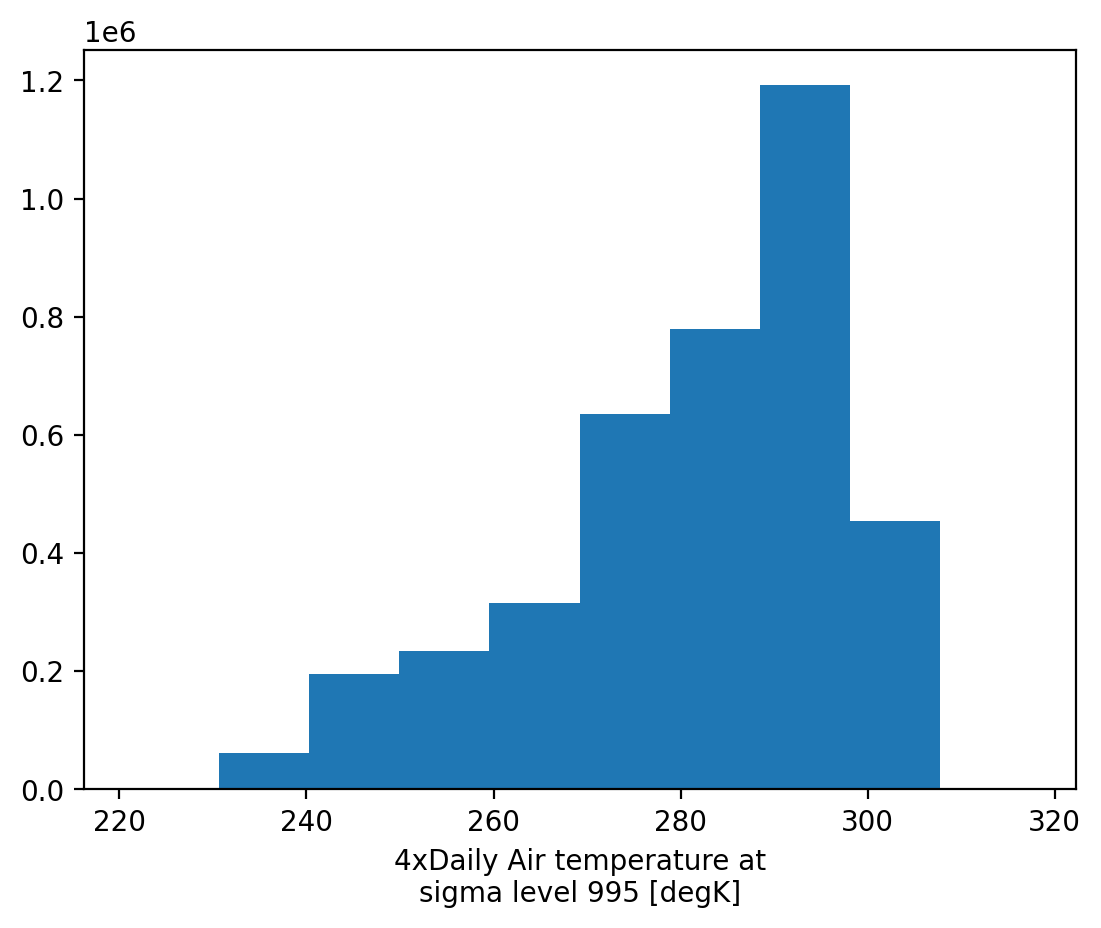

                                                                                                           
                                         Total time elapsed: 1.023 seconds                                 
                                      33 GPU function calls in 0.011 seconds                               
                                       1 CPU function calls in 0.005 seconds                               
                                                                                                           
                                                       Stats                                               
                                                                                                           
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function              ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__  │ 20         │ 0.006       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy     │ 2          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__len__ │ 10         │ 0.003       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.copy    │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ notna                 │ 0          │ 0.000       │ 0.000       │ 1          │ 0.005       │ 0.005       │
└───────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- notna

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=98034;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

In [4]:
%%cudf.pandas.profile

ds.Tair.plot()

You can pass extra arguments to the underlying `hist()` call. See the [matplotlib
docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) for
all possible keyword arguments.

**Tip:** Note that the returned values are exactly what matplotlib would return

### Exercise

Update the above plot to show 50 bins with unfilled steps instead of filled
bars.


<a id='2d'></a>

## 2D plots

Now we will explore 2D plots. Let's select a single timestep of `Tair` to
visualize.


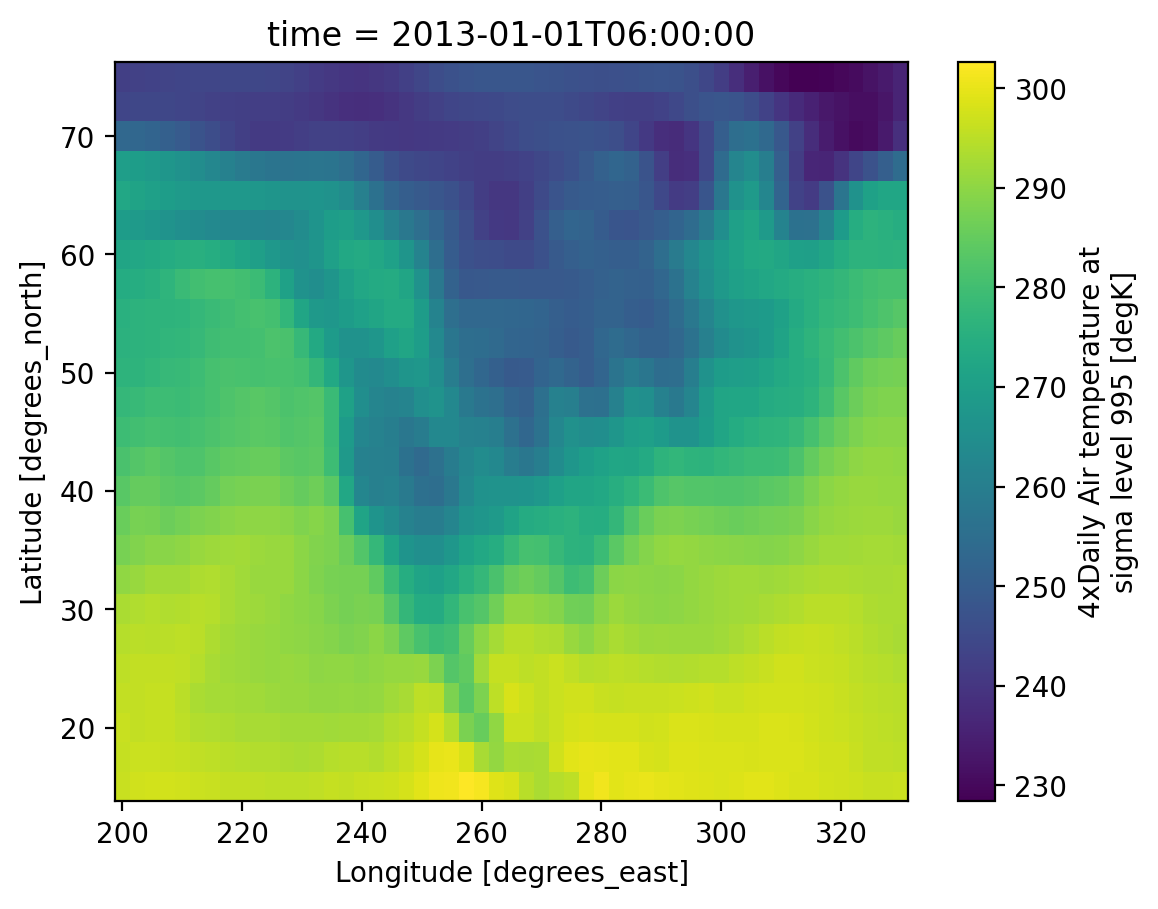

                                                                                                               
                                           Total time elapsed: 1.638 seconds                                   
                                        32 GPU function calls in 0.015 seconds                                 
                                         1 CPU function calls in 0.001 seconds                                 
                                                                                                               
                                                         Stats                                                 
                                                                                                               
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                  ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ DatetimeIndex.__len__     │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__getitem__ │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Series                    │ 2          │ 0.005       │ 0.002       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__len__      │ 26         │ 0.008       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy         │ 2          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ isna                      │ 0          │ 0.000       │ 0.000       │ 1          │ 0.001       │ 0.001       │
└───────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- isna

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=74110;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

In [5]:
%%cudf.pandas.profile

ds.Tair.isel(time=1).plot()

This is identical to `.plot.pcolormesh` which is more explicit

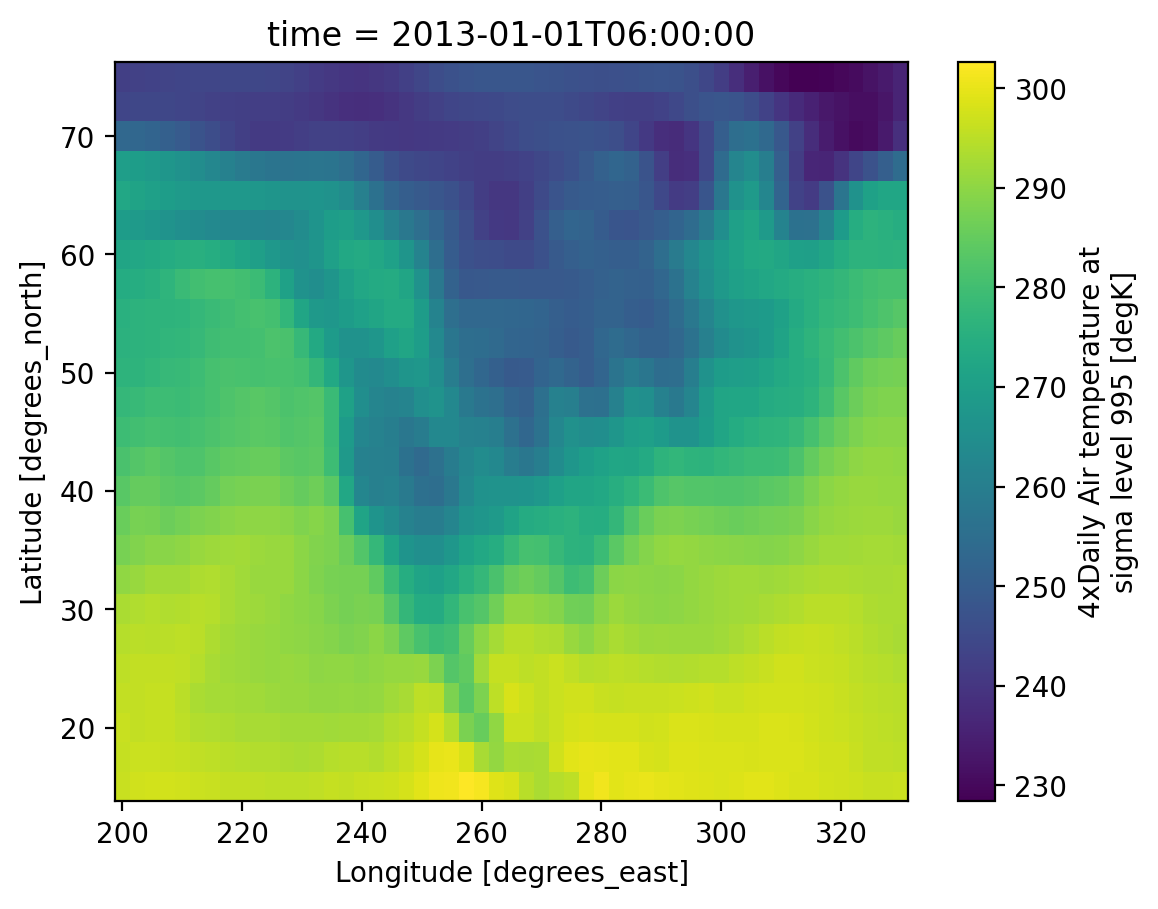

                                                                                                               
                                           Total time elapsed: 1.537 seconds                                   
                                        11 GPU function calls in 0.006 seconds                                 
                                         1 CPU function calls in 0.001 seconds                                 
                                                                                                               
                                                         Stats                                                 
                                                                                                               
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                  ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ DatetimeIndex.__len__     │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__getitem__ │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Series                    │ 1          │ 0.002       │ 0.002       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__len__      │ 8          │ 0.002       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ isna                      │ 0          │ 0.000       │ 0.000       │ 1          │ 0.001       │ 0.001       │
└───────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- isna

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=54759;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

In [6]:
%%cudf.pandas.profile

ds.Tair.isel(time=1).plot.pcolormesh()

Notice how much information is on that plot!

1. The x- and y-axes are labeled with full names — "Latitude", "Longitude" — along with units. 
2. The colorbar has a nice label, again with units. 
3. And the title tells us the timestamp of the data presented.

`plot.pcolormesh` takes many [keyword arguments](https://docs.xarray.dev/en/stable/generated/xarray.plot.pcolormesh.html) and is quite sophisticated.

Here is a more complicated figure that explicitly sets `time` as the x-axis,
customizes the colorbar, and overlays two contours at specific levels.

**Tip:** Other options for 2D plots include [.plot.contour](https://docs.xarray.dev/en/stable/generated/xarray.plot.contour.html), [.plot.contourf](https://docs.xarray.dev/en/stable/generated/xarray.plot.pcolormesh.html),
[.plot.imshow](https://docs.xarray.dev/en/stable/generated/xarray.plot.imshow.html)


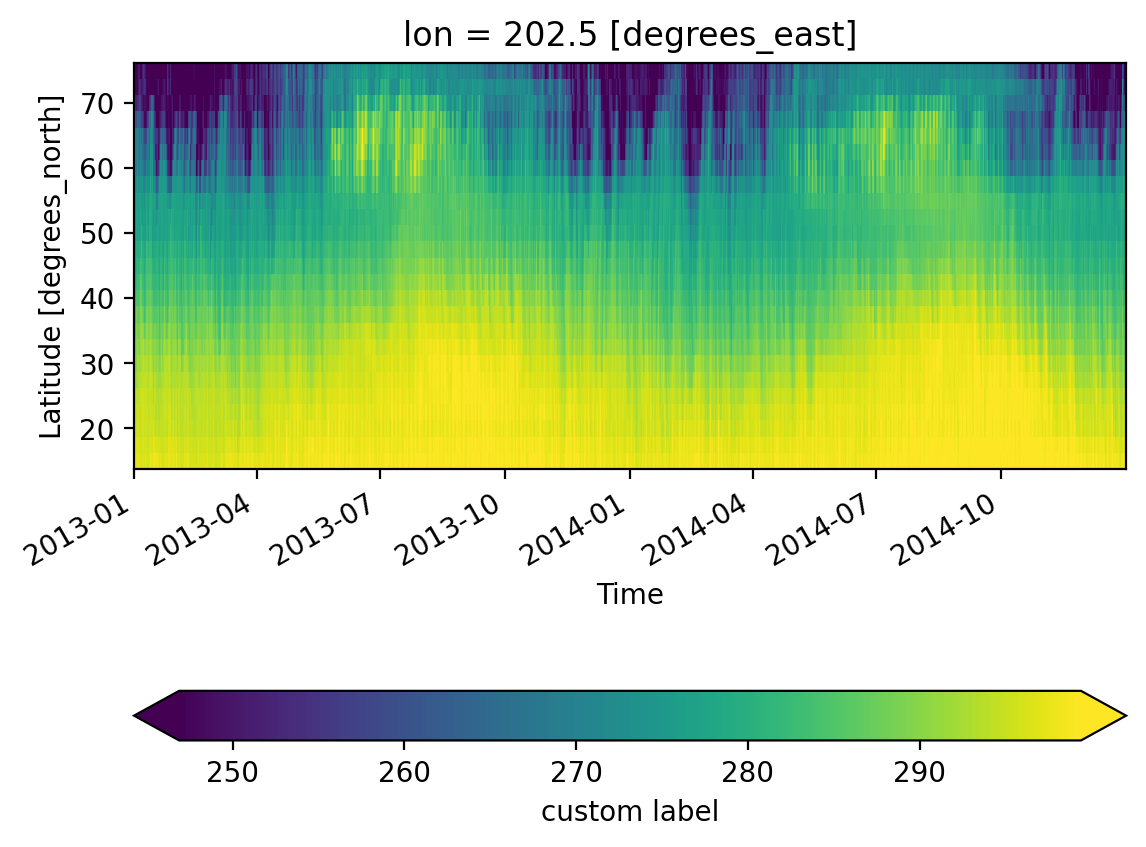

                                                                                                              
                                          Total time elapsed: 3.760 seconds                                   
                                        36 GPU function calls in 0.015 seconds                                
                                        1 CPU function calls in 0.001 seconds                                 
                                                                                                              
                                                        Stats                                                 
                                                                                                              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                 ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__     │ 17         │ 0.006       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__getitem__ │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy        │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__len__    │ 16         │ 0.006       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.copy       │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ isna                     │ 0          │ 0.000       │ 0.000       │ 1          │ 0.001       │ 0.001       │
└──────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- isna

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=222240;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

In [7]:
%%cudf.pandas.profile

ds.Tair.isel(lon=1).plot(
    x="time",  # coordinate to plot on the x-axis of the plot
    robust=True,  # set colorbar limits to 2nd and 98th percentile of data
    cbar_kwargs={  # passed to plt.colorbar
        "orientation": "horizontal",
        "label": "custom label",
        "pad": 0.3,
    },
)

### Exercise

Update the above plot to use a different matplotlib colormap.


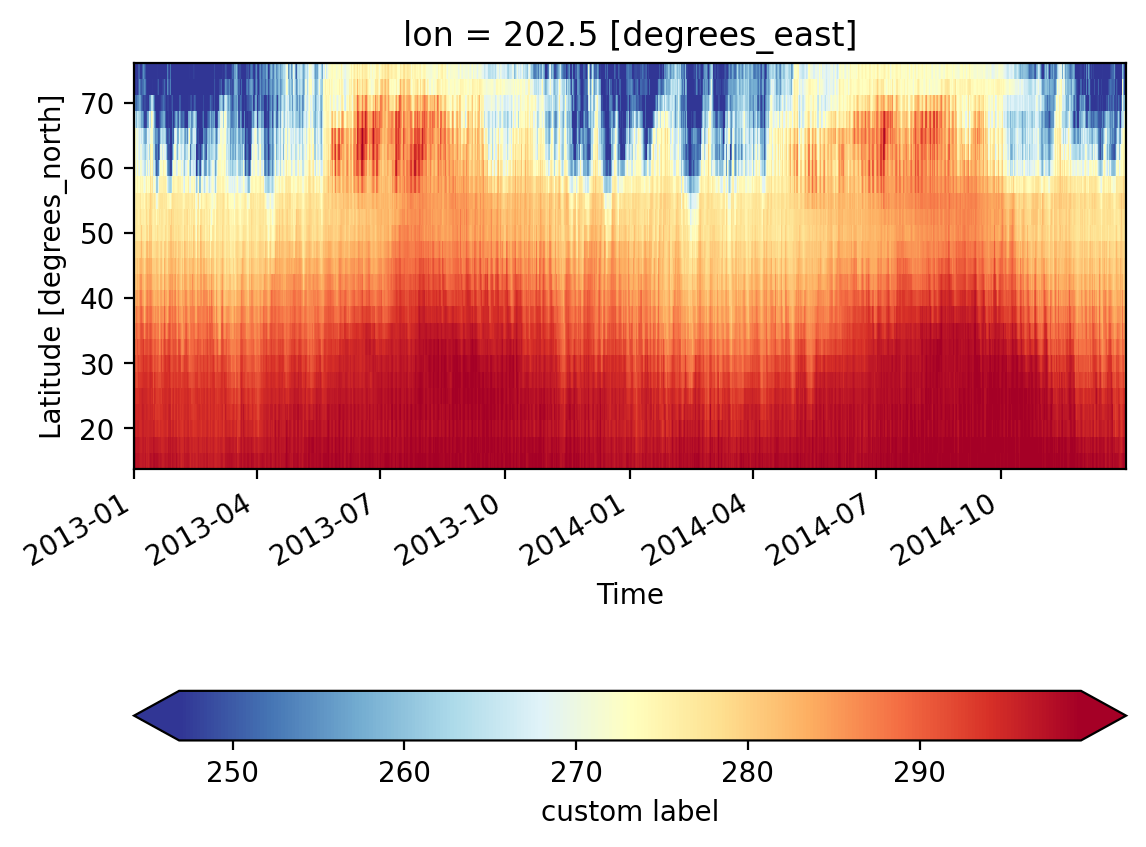

                                                                                                              
                                          Total time elapsed: 3.777 seconds                                   
                                        36 GPU function calls in 0.012 seconds                                
                                        1 CPU function calls in 0.001 seconds                                 
                                                                                                              
                                                        Stats                                                 
                                                                                                              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                 ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__     │ 17         │ 0.006       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__getitem__ │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy        │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__len__    │ 16         │ 0.005       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.copy       │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ isna                     │ 0          │ 0.000       │ 0.000       │ 1          │ 0.001       │ 0.001       │
└──────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- isna

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=110594;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

In [8]:
%%cudf.pandas.profile

ds.Tair.isel(lon=1).plot(
    x="time",  # coordinate to plot on the x-axis of the plot
    robust=True,  # set colorbar limits to 2nd and 98th percentile of data
    cmap=mpl.cm.RdYlBu_r,
    cbar_kwargs={  # passed to plt.colorbar
        "orientation": "horizontal",
        "label": "custom label",
        "pad": 0.3,
    },
)

### Exercise

Now overlay a [contour plot](https://docs.xarray.dev/en/stable/generated/xarray.plot.contour.html) on top of the previous plot


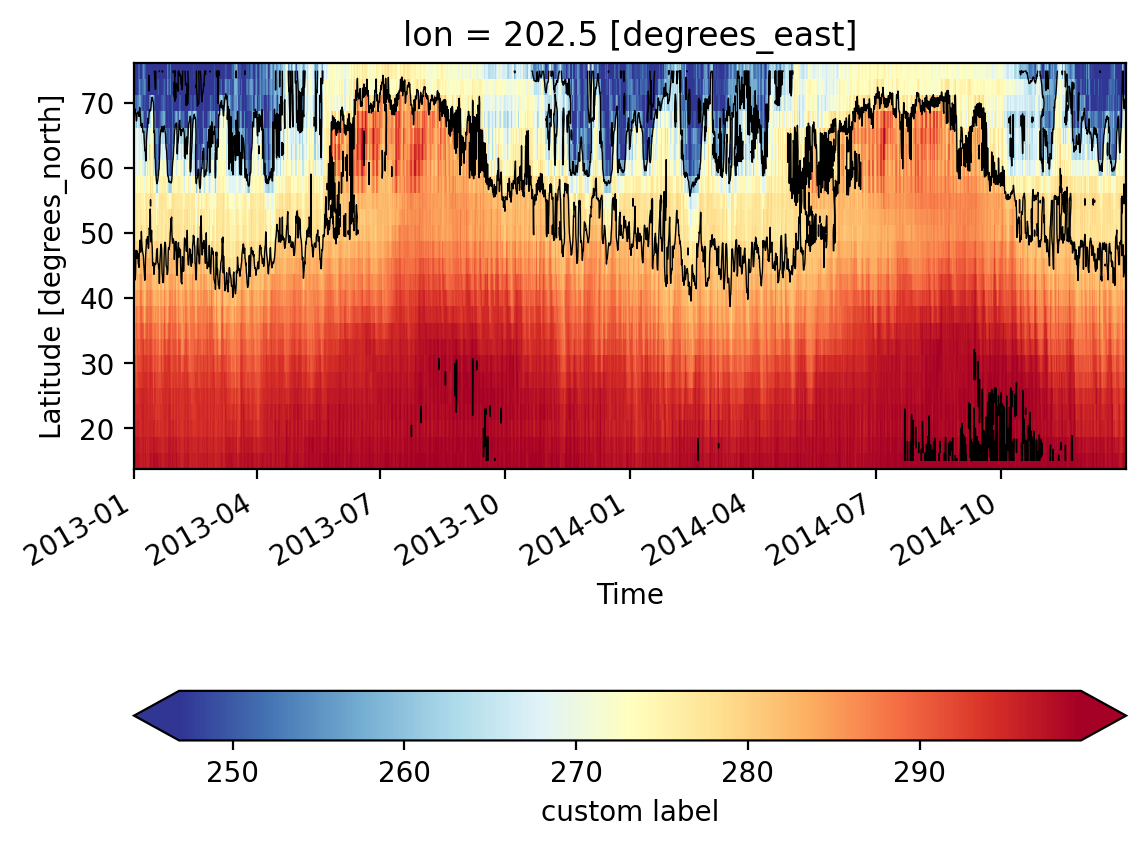

                                                                                                              
                                          Total time elapsed: 4.006 seconds                                   
                                        32 GPU function calls in 0.012 seconds                                
                                        2 CPU function calls in 0.001 seconds                                 
                                                                                                              
                                                        Stats                                                 
                                                                                                              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                 ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__     │ 16         │ 0.005       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__getitem__ │ 2          │ 0.002       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__len__    │ 14         │ 0.005       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ isna                     │ 0          │ 0.000       │ 0.000       │ 2          │ 0.001       │ 0.001       │
└──────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- isna

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=213315;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

In [9]:
%%cudf.pandas.profile

ds.Tair.isel(lon=1).plot.pcolormesh(
    x="time",  # coordinate to plot on the x-axis of the plot
    robust=True,  # set colorbar limits to 2nd and 98th percentile of data
    cmap=mpl.cm.RdYlBu_r,
    cbar_kwargs={  # passed to plt.colorbar
        "orientation": "horizontal",
        "label": "custom label",
        "pad": 0.3,
    },
)
ds.Tair.isel(lon=1).plot.contour(
    x="time",  # coordinate to plot on the x-axis of the plot
    levels=5,  # autoselect 5 levels between max, min
    # The following are passed to plt.contour
    colors="k",
    linewidths=0.5,
)

<a id='1d'></a>

## 1D line plots

xarray is also able to plot lines by wrapping `plt.plot()`. As in the earlier
examples, the axes are labelled and keyword arguments can be passed to the
underlying `matplotlib` call.


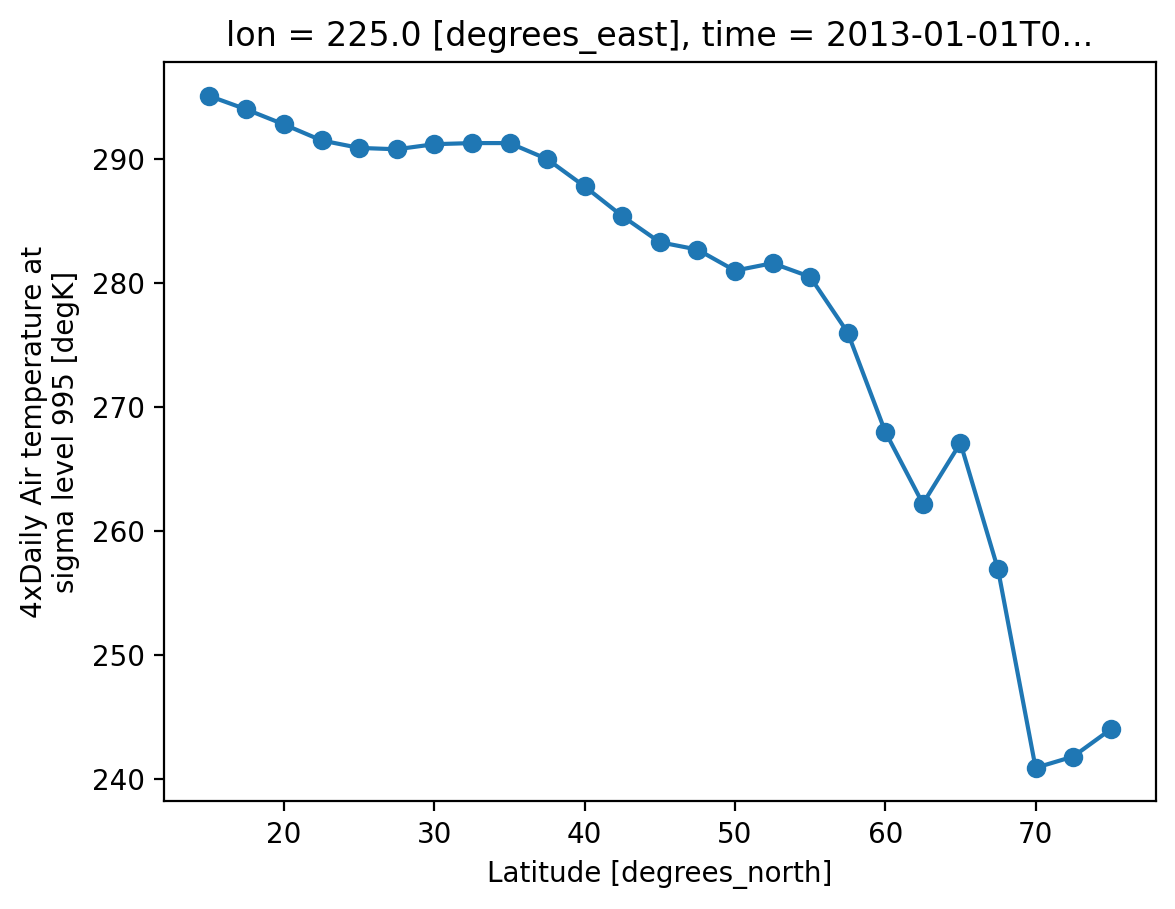

                                                                                                               
                                           Total time elapsed: 0.984 seconds                                   
                                        21 GPU function calls in 0.012 seconds                                 
                                         0 CPU function calls in 0.000 seconds                                 
                                                                                                               
                                                         Stats                                                 
                                                                                                               
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                  ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__      │ 15         │ 0.005       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__getitem__  │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__len__     │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__getitem__ │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Series                    │ 2          │ 0.005       │ 0.002       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy         │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
└───────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

In [10]:
%%cudf.pandas.profile

ds.Tair.isel(time=1, lon=10).plot(marker="o")

Again, this is equivalent to the more explicit [plot.line](https://docs.xarray.dev/en/stable/generated/xarray.plot.line.html)

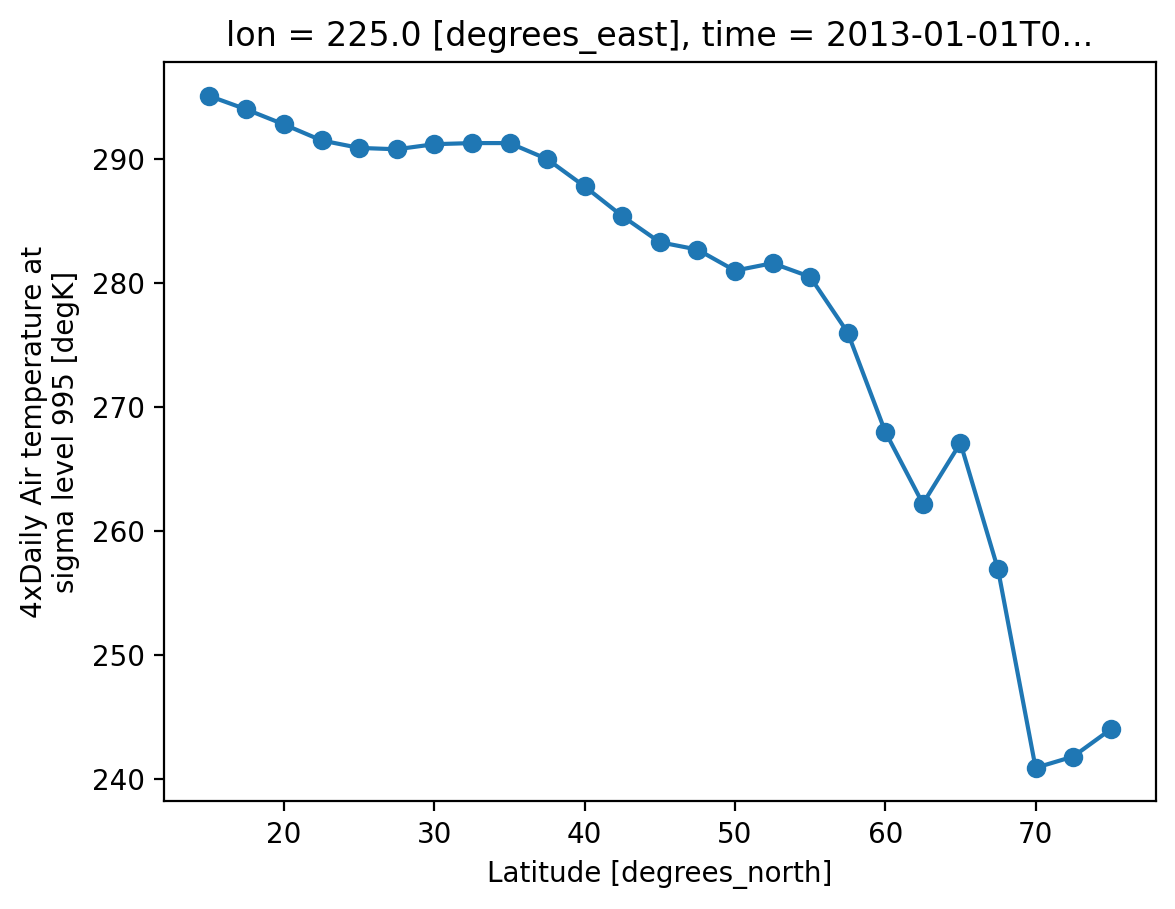

                                                                                                               
                                           Total time elapsed: 0.969 seconds                                   
                                        10 GPU function calls in 0.006 seconds                                 
                                         0 CPU function calls in 0.000 seconds                                 
                                                                                                               
                                                         Stats                                                 
                                                                                                               
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                  ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Float32Index.__len__      │ 6          │ 0.002       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__getitem__  │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__len__     │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__getitem__ │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Series                    │ 1          │ 0.002       │ 0.002       │ 0          │ 0.000       │ 0.000       │
└───────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

In [11]:
%%cudf.pandas.profile

ds.Tair.isel(time=1, lon=10).plot.line(marker="o")

### Multiple lines with `hue` 

Lets say we want to compare line plots of temperature at three different
latitudes. We can use the `hue` kwarg to do this.


In [12]:
%%cudf.pandas.profile

ds.Tair.isel(time=1).sel(lat=[40, 50, 60], method="nearest").plot(x="lon", hue="lat")

AssertionError: 

                                                                                                               
                                          Total time elapsed: 13.189 seconds                                   
                                        20 GPU function calls in 0.281 seconds                                 
                                         1 CPU function calls in 0.007 seconds                                 
                                                                                                               
                                                         Stats                                                 
                                                                                                               
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                  ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ DatetimeIndex.__len__     │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__getitem__ │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Series                    │ 3          │ 0.007       │ 0.002       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__len__      │ 5          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float64Index.get_indexer  │ 0          │ 0.000       │ 0.000       │ 1          │ 0.007       │ 0.007       │
│ ndarray.reshape           │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ ndarray.__lt__            │ 1          │ 0.099       │ 0.099       │ 0          │ 0.000       │ 0.000       │
│ ndarray.any               │ 1          │ 0.164       │ 0.164       │ 0          │ 0.000       │ 0.000       │
│ Float64Index.__getitem__  │ 1          │ 0.004       │ 0.004       │ 0          │ 0.000       │ 0.000       │
│ Float64Index.__len__      │ 4          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float64Index.copy         │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ ndarray.astype            │ 1          │ 0.002       │ 0.002       │ 0          │ 0.000       │ 0.000       │
└───────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- Float64Index.get_indexer

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=326730;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

## Customization

All of xarray's plotting functions take an large list kwargs that customize
behaviour. A full list can be seen [here](https://docs.xarray.dev/en/stable/generated/xarray.plot.pcolormesh.html). That
said xarray does not wrap all matplotlib functionality.

The general strategy for making plots that are more complicated that the
examples above is

1. Create a matplotlib axis `ax`
2. Use xarray to make a close approximation of the final plot specifying
   `ax=ax`.
3. Use `ax` methods to fully customize the plot


## More resources

1. [Xarray's visualization gallery](https://docs.xarray.dev/en/stable/examples/visualization_gallery.html)
2. [Xarray's plotting documentation](https://docs.xarray.dev/en/stable/plotting.html)

